# Task
Load the dataset , clean it and perform an exploratory data analysis and also summarize all your findings at the end of the notebook using markdown

Here is all the data you need:
"tips.csv"

## Data loading

### Subtask:
Load the "tips.csv" dataset.


**Reasoning**:
Load the "tips.csv" dataset into a pandas DataFrame and display its first few rows and shape.



In [3]:
import pandas as pd

try:
    df = pd.read_csv('tips(1).csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'tips.csv' not found. Please ensure the file exists in the current directory.")
    df = None

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


(244, 7)


## Data cleaning

### Subtask:
Clean the DataFrame `df` by handling missing values, duplicates, and inconsistencies.


**Reasoning**:
Inspect the DataFrame for missing values, duplicates, incorrect data types, and inconsistencies in categorical columns. Then, clean the data accordingly.



In [4]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")
if len(duplicate_rows) > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

# Check data types and convert if necessary
print("\nData types before conversion:")
print(df.dtypes)

# No data type conversion is needed as all columns have appropriate data types.

# Check for inconsistencies in categorical columns
for col in ['sex', 'smoker', 'day', 'time']:
    print(f"\nUnique values in '{col}' column:")
    print(df[col].unique())

# Standardize values in categorical columns if needed.
# In this case, no standardization is required as the categories are consistent.

# Display first few rows and shape of the cleaned DataFrame
display(df.head())
print(df.shape)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Number of duplicate rows: 1
Duplicate rows removed.

Data types before conversion:
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

Unique values in 'sex' column:
['Female' 'Male']

Unique values in 'smoker' column:
['No' 'Yes']

Unique values in 'day' column:
['Sun' 'Sat' 'Thur' 'Fri']

Unique values in 'time' column:
['Dinner' 'Lunch']


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


(243, 7)


## Data exploration

### Subtask:
Explore the basic statistics and distributions of the data in the cleaned DataFrame `df`.


**Reasoning**:
Calculate descriptive statistics for numerical features, analyze the distribution of categorical features, and document the findings.



In [5]:
# Calculate descriptive statistics for numerical features
numerical_features = ['total_bill', 'tip']
print("Descriptive statistics for numerical features:")
display(df[numerical_features].describe())

# Analyze the distribution of categorical features
categorical_features = ['sex', 'smoker', 'day', 'time']

for col in categorical_features:
    print(f"\nDistribution of '{col}':")
    print(df[col].value_counts())

# Analyze the distribution of 'size' as a categorical feature
print(f"\nDistribution of 'size':")
print(df['size'].value_counts())

# Document findings (this will be part of the final summary)
# Key Statistics and Observations:
# ... (Add key statistics and observations here)
# For example:
# The average total bill is [mean], with a standard deviation of [std].
# The most frequent day is [day] with [frequency] occurences.
# ... (add more observations for other columns)

Descriptive statistics for numerical features:


,total_bill,tip
count,243.000000,243.000000
mean,19.813868,3.002387
std,8.910071,1.385002
min,3.070000,1.000000
25%,13.380000,2.000000
50%,17.810000,2.920000
75%,24.175000,3.575000
max,50.810000,10.000000



Distribution of 'sex':
sex
Male      157
Female     86
Name: count, dtype: int64

Distribution of 'smoker':
smoker
No     151
Yes     92
Name: count, dtype: int64

Distribution of 'day':
day
Sat     87
Sun     76
Thur    61
Fri     19
Name: count, dtype: int64

Distribution of 'time':
time
Dinner    176
Lunch      67
Name: count, dtype: int64

Distribution of 'size':
size
2    155
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64


## Data analysis

### Subtask:
Analyze the relationships between variables in the dataset.


**Reasoning**:
Analyze the relationships between numerical features using correlation and explore the relationships between categorical and numerical features using groupby().



In [6]:
# Calculate the correlation between numerical features
numerical_features = ['total_bill', 'tip', 'size']
correlation_matrix = df[numerical_features].corr()
display(correlation_matrix)

print("Correlation Observations:")
if correlation_matrix.loc['total_bill', 'tip'] > 0.5:
    print("There is a strong positive correlation between total bill and tip amount.")
elif correlation_matrix.loc['total_bill', 'tip'] > 0:
    print("There is a weak positive correlation between total bill and tip amount.")
else:
    print("There is no or weak correlation between total bill and tip amount.")

# Explore relationships between categorical and numerical features
print("\nAverage tip amount by day:")
display(df.groupby('day')['tip'].mean())
print("\nAverage tip amount by time:")
display(df.groupby('time')['tip'].mean())
print("\nAverage tip amount by sex:")
display(df.groupby('sex')['tip'].mean())
print("\nAverage tip amount by smoker:")
display(df.groupby('smoker')['tip'].mean())

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


Correlation Observations:
There is a strong positive correlation between total bill and tip amount.

Average tip amount by day:


,tip
day,
Fri,2.734737
Sat,2.993103
Sun,3.255132
Thur,2.784098



Average tip amount by time:


,tip
time,
Dinner,3.102670
Lunch,2.738955



Average tip amount by sex:


,tip
sex,
Female,2.843140
Male,3.089618



Average tip amount by smoker:


,tip
smoker,
No,2.991854
Yes,3.019674


## Data visualization

### Subtask:
Visualize the relationships and distributions identified in the data exploration and analysis steps.


**Reasoning**:
Visualize the relationships and distributions using scatter plots, box plots, histograms, and bar charts as instructed.



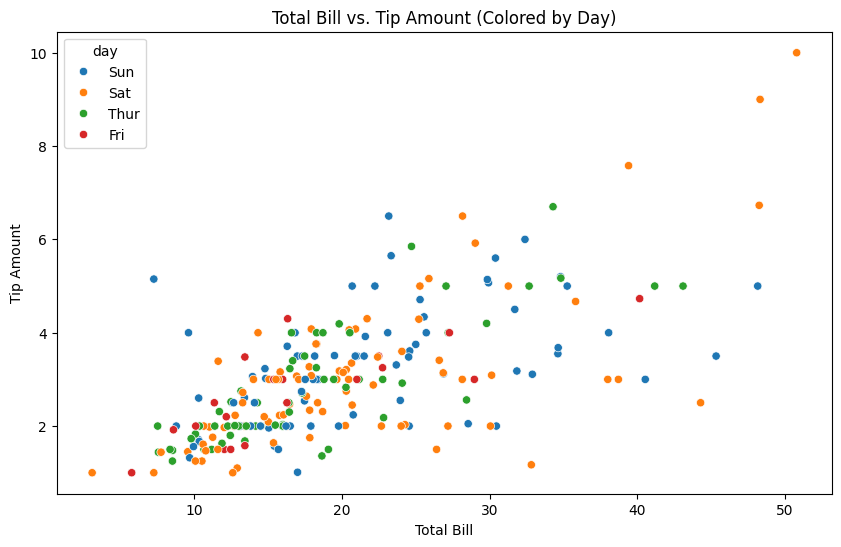

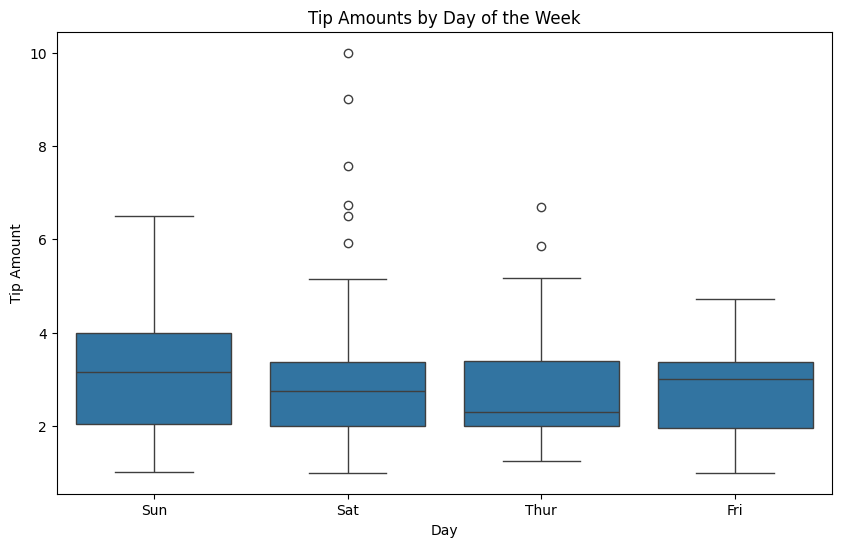

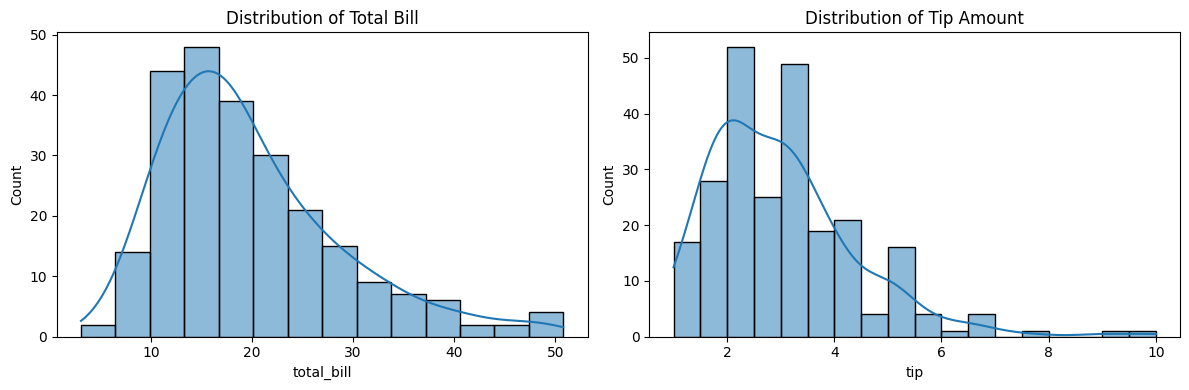

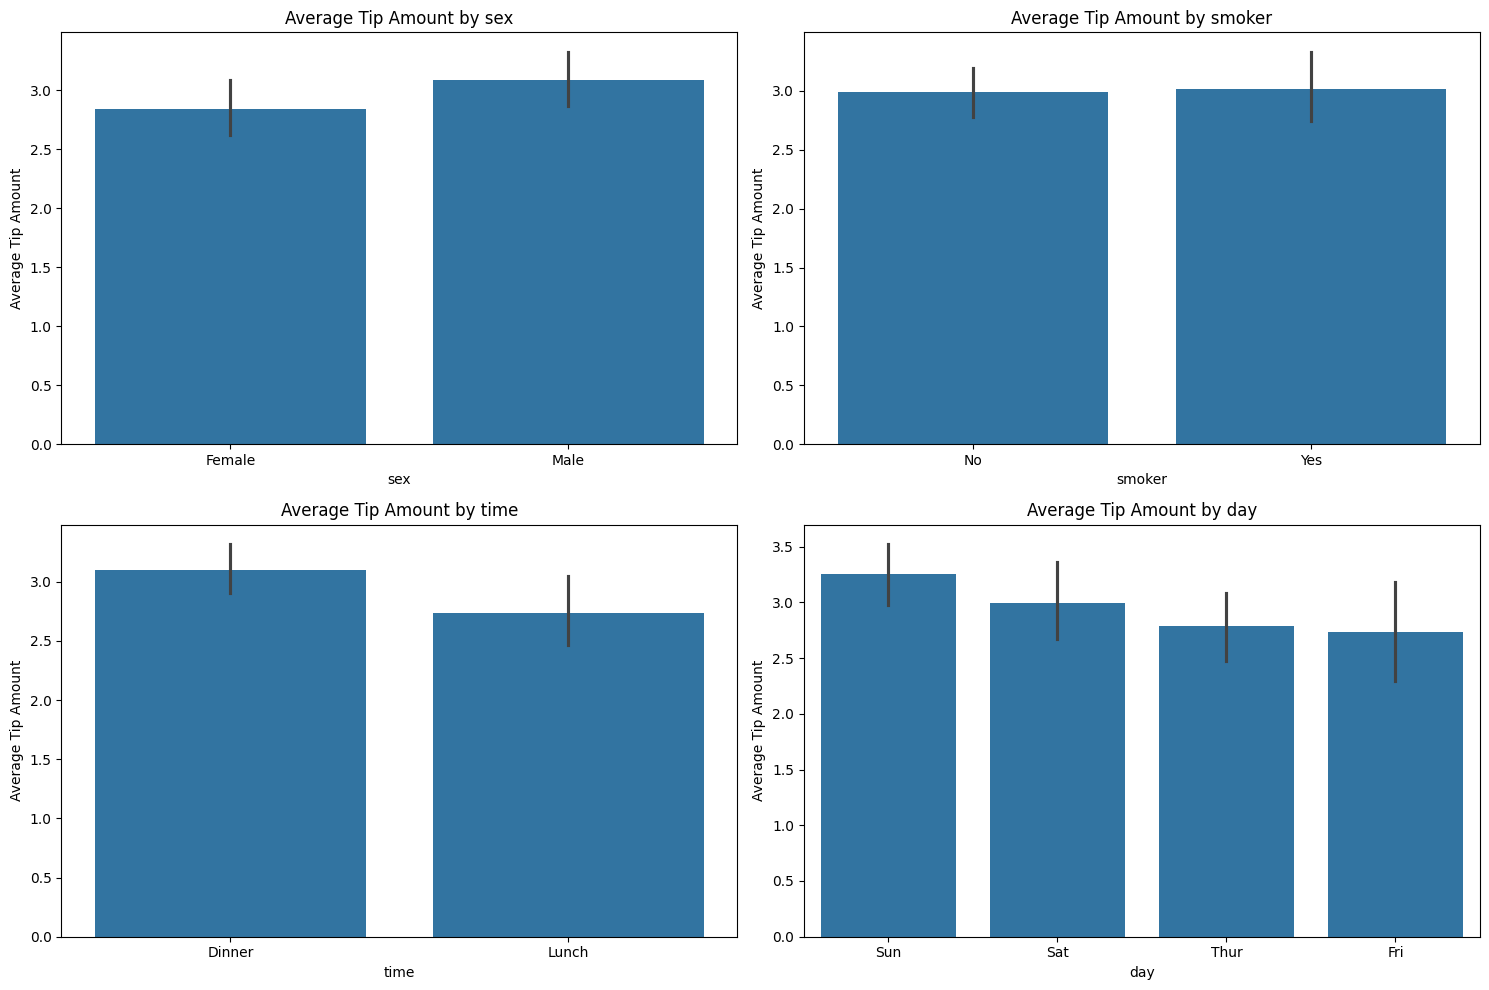

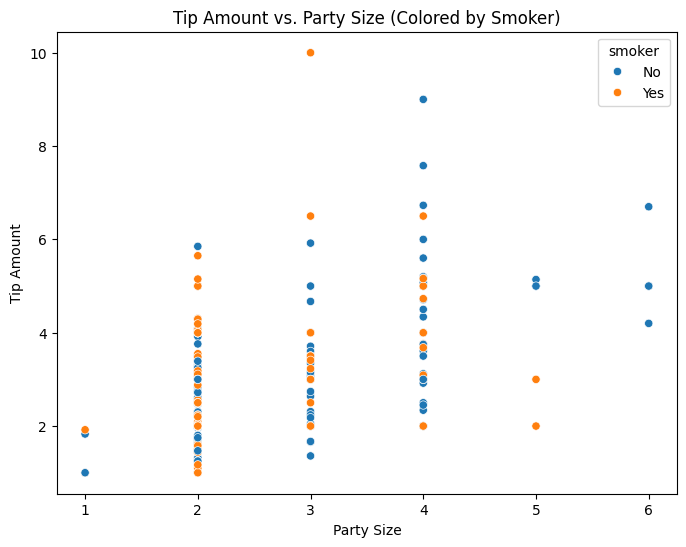

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of 'total_bill' vs. 'tip' colored by 'day'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue='day', data=df)
plt.title('Total Bill vs. Tip Amount (Colored by Day)')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.savefig("scatter.png")
plt.show()

# 2. Box plots of 'tip' amounts grouped by 'day'
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='tip', data=df)
plt.title('Tip Amounts by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Tip Amount')
plt.savefig("box.png",dpi=500)
plt.show()

# 3. Histograms for 'total_bill' and 'tip'
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['total_bill'], kde=True)
plt.title('Distribution of Total Bill')

plt.subplot(1, 2, 2)
sns.histplot(df['tip'], kde=True)
plt.title('Distribution of Tip Amount')
plt.tight_layout()
plt.show()

# 4. Bar charts for average tip amount by category
categorical_cols = ['sex', 'smoker', 'time', 'day']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.barplot(x=col, y='tip', data=df, ax=axes[i])
    axes[i].set_title(f'Average Tip Amount by {col}')
    axes[i].set_ylabel('Average Tip Amount')

plt.tight_layout()
plt.show()

# 5. Additional Visualization: Size vs Tip
plt.figure(figsize=(8,6))
sns.scatterplot(x='size', y='tip', hue='smoker', data=df)
plt.title('Tip Amount vs. Party Size (Colored by Smoker)')
plt.xlabel('Party Size')
plt.ylabel('Tip Amount')
plt.show()

## Summary:

### 1. Q&A

No questions were explicitly asked in the provided task.  However, the various analysis steps implicitly aim to answer questions about the dataset such as:

* What are the key descriptive statistics of the numerical variables?
* How are the categorical variables distributed?
* What are the relationships between total bill and tip amounts?
* How do tips vary by day of the week, time of day, gender, and smoker status?
* What is the relationship between party size and tip amount?


### 2. Data Analysis Key Findings

* **Data Cleaning:** One duplicate row was removed from the dataset.  No missing values or data type inconsistencies were found.
* **Descriptive Statistics:** The average total bill was $19.81 with a standard deviation of $8.91, and the average tip was $3.00 with a standard deviation of $1.39.
* **Correlation:** A strong positive correlation (0.675) exists between total bill and tip amount.  There's also a positive correlation between total bill and party size (0.598), and between tip and party size (0.488).
* **Tip Amount by Day:** Tip amounts tend to be higher on Sunday and Saturday.
* **Tip Amount by Time:** Dinner service has a higher average tip than lunch.
* **Tip Amount by Sex:** Male customers have a slightly higher average tip than female customers.
* **Tip Amount by Smoker Status:**  Minimal difference observed between smokers and non-smokers.
* **Party Size and Tip:** Visual inspection of the scatter plot suggests a potential relationship between party size and tip amount, possibly influenced by smoker status.


### 3. Insights or Next Steps

* **Investigate potential outliers:**  Further analysis of outliers in the 'total_bill' and 'tip' distributions could reveal interesting patterns or errors in the data.
* **Explore interaction effects:** Deeper analysis to determine if there are interactions between categorical variables (e.g., does the relationship between total bill and tip amount differ by day or time of day?).  Consider using more advanced statistical models or visualizations to explore these interactions.
